In [46]:
%load_ext autoreload
%autoreload 2
import os 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
import mlflow
from common_params import input_shape, img_dir, model_dir, data_dir
from common_img_functions import read_img
from common_plots import plot_img

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load model


In [ ]:
img = keras.preprocessing.image.load_img(
    os.path.join(data_dir, "cat/Image_17.jpg"), target_size=input_shape
)


In [13]:
mlflow_run_id = "d29193878aaf45ea8c830cb92bdd7b63"
# Logged model in MLFlow
save_dir = os.path.join(model_dir,mlflow_run_id)
logged_model_path = os.path.join(model_dir)

# Load model as a Keras model
loaded_model = mlflow.keras.load_model(logged_model_path)

In [14]:
test_img = read_img(os.path.join(data_dir , "extracted\\test\\n02085936-Maltese_dog\\n02085936_233_0.jpg"))
test_imge = np.expand_dims(test_img, axis=0)

In [15]:
class_names_from_folder = [ name.split('-')[1] for name in ['n02085936-Maltese_dog', 'n02088094-Afghan_hound'] ]
predictions = loaded_model.predict(test_imge)[0]
print(f"This image as a probability {round(100*predictions[0],2)}% \
    {class_names_from_folder[0]} of and a probability { round(100*predictions[1],2)}% of {class_names_from_folder[1]}")

1/1 [==============================] - 0s 354ms/step
This image as a probability 97.06%     Maltese_dog of and a probability 2.94% of Afghan_hound


In [16]:
input_shape

(224, 224, 3)

In [37]:
test_dir = os.path.join(data_dir,"images_subset","test")

test_ds = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=1,
    image_size=(input_shape[0],input_shape[1]) )

Found 55 files belonging to 2 classes.


In [21]:
import math

In [34]:
len(test_ds)

2

In [38]:
test_loss, test_accuracy = loaded_model.evaluate(test_ds)
print('Accuracy on test dataset:', test_accuracy)

55/55 [==============================] - 3s 53ms/step - loss: 0.0204 - accuracy: 1.0000
Accuracy on test dataset: 1.0


In [39]:
for test_images, test_labels in test_ds.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = loaded_model.predict(test_images)

1/1 [==============================] - 0s 339ms/step


In [54]:
test_images.shape

(1, 224, 224, 3)

In [57]:
test_labels

array([[0., 1.]], dtype=float32)

In [55]:
test_images[0].shape

(224, 224, 3)

In [48]:
test_images_re = test_images.reshape(input_shape)

In [63]:
import matplotlib.pyplot as plt 

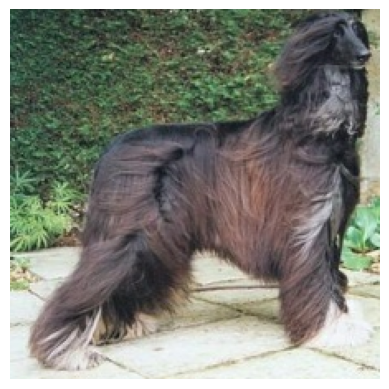

In [68]:
plt.axis("off")
plt.imshow(np.array(test_images[0],np.int32))
plt.show()

In [42]:
predictions

array([[0.23618926, 0.76381075]], dtype=float32)

In [36]:
test_accuracy

1.0

In [31]:
test_loss

0.02036060020327568

In [27]:
predictions.shape

(32, 2)

In [28]:
predictions[0]

array([1.00000e+00, 4.98852e-12], dtype=float32)

In [29]:
test_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)